# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

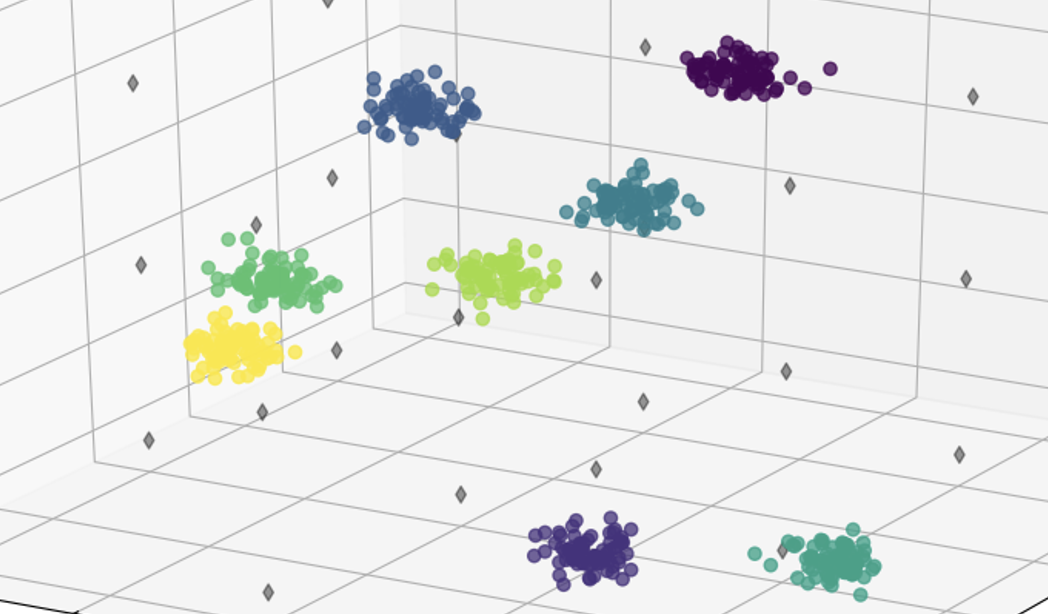

In [5]:
np.random.seed(42)

class_0 = np.random.randn(1000 // 2, 2) + np.array([-2, -2])
class_1 = np.random.randn(1000 // 2, 2) + np.array([2, 2])

noise_scale = 0.2  
class_0 += np.random.normal(0, noise_scale, class_0.shape)
class_1 += np.random.normal(0, noise_scale, class_1.shape)

X = np.vstack((class_0, class_1))
Y = np.hstack((np.zeros(1000 // 2), np.ones(1000 // 2)))

df = pd.DataFrame(X, columns=['x', 'y'])
df['Class'] = Y
df.to_csv('task1_df.csv', index=False)

df.sample(10)

,x,y,Class
407,-0.601644,-3.322730,0.0
431,-0.672953,-0.067850,0.0
768,2.649390,1.304819,1.0
947,1.833026,1.830315,1.0
22,-3.643006,-2.495638,0.0
735,3.178352,1.374041,1.0
818,0.977053,2.497611,1.0
592,0.854332,3.206886,1.0
743,0.887673,0.372177,1.0
337,-3.609223,-3.170342,0.0


Text(0.5, 1.0, 'Generated Data for Two Classes')

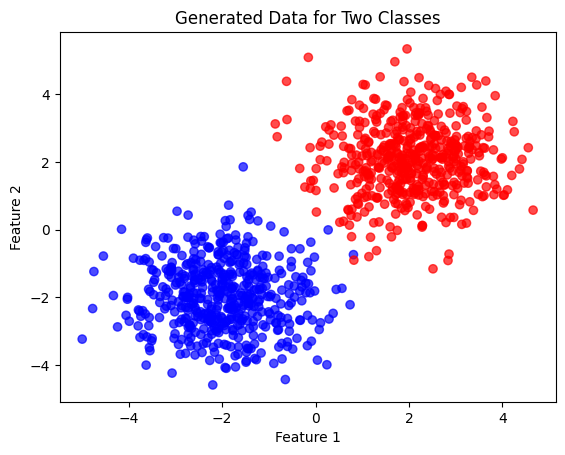

In [6]:
plt.scatter(df['x'], df['y'], c=df['Class'], cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data for Two Classes')

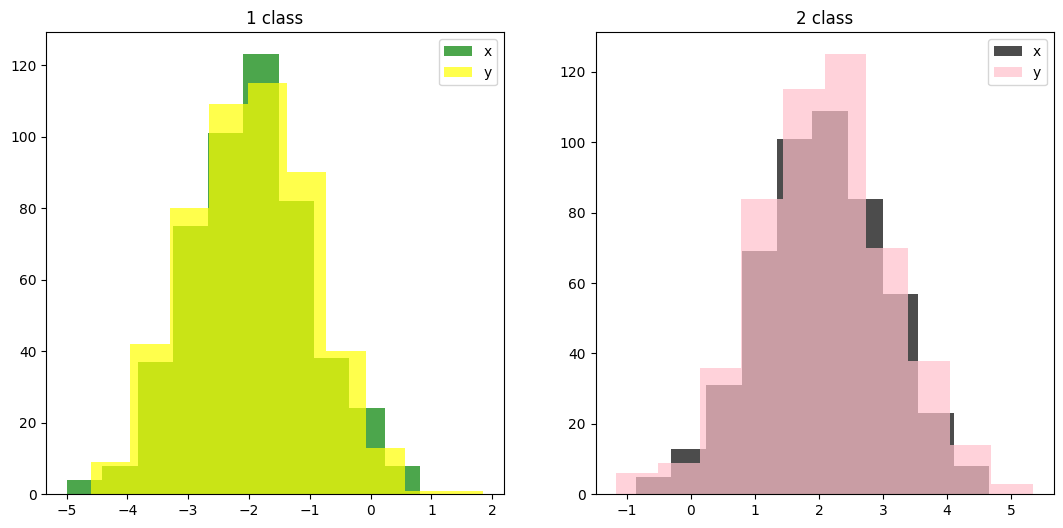

In [7]:

figs,axes = plt.subplots(ncols=2, figsize=(13,6))

axes[0].hist(df[df['Class'] == 0]['x'], bins=10, color='green', alpha=0.7, label='x')
axes[0].hist(df[df['Class'] == 0]['y'], bins=10, color='yellow', alpha=0.7, label='y')
axes[0].set_title('1 class')
axes[0].legend()
axes[1].hist(df[df['Class'] == 1]['x'], bins=10, color='black', alpha=0.7, label='x')
axes[1].hist(df[df['Class'] == 1]['y'], bins=10, color='pink', alpha=0.7, label='y')
axes[1].set_title('2 class')
axes[1].legend()

In [8]:
#code

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

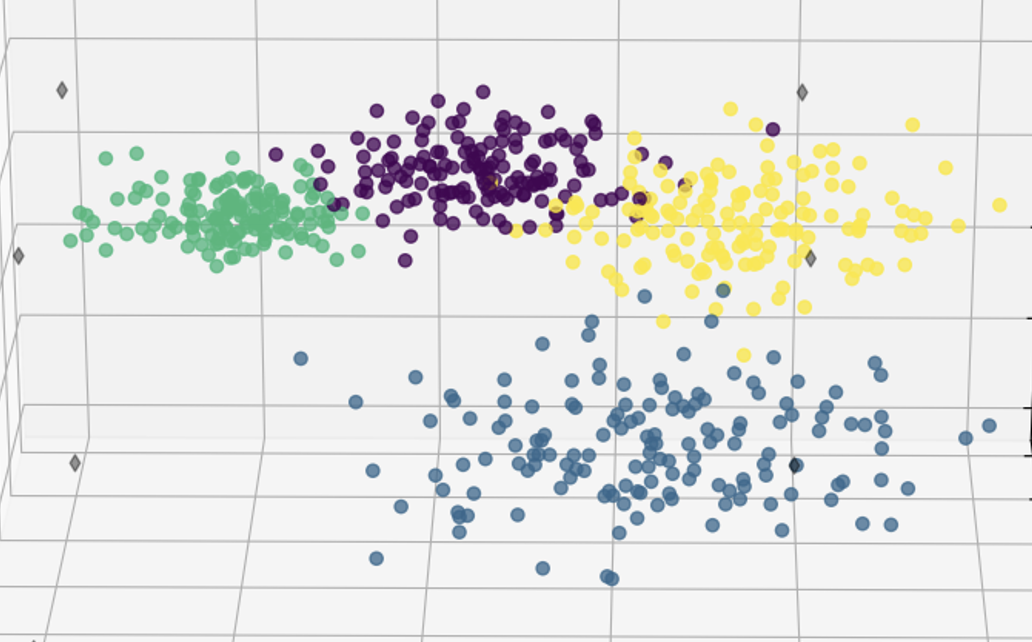

In [9]:
np.random.seed(50)
class_0 = np.random.randn(300, 2) + np.array([-2, 4])
class_1 = np.random.randn(300, 2) + np.array([-1, -1])
class_2 = np.random.randn(300, 2) + np.array([3, 3])

noise_scale = 0.2  
class_0 += np.random.normal(0, noise_scale, class_0.shape)
class_1 += np.random.normal(0, noise_scale, class_1.shape)
class_2 += np.random.normal(0, noise_scale, class_2.shape)


X = np.vstack((class_0, class_1, class_2))
Y = np.hstack((np.zeros(300), np.ones(300), [2] * 300))

df = pd.DataFrame(X, columns=['x', 'y'])
df['Class'] = Y
df.to_csv('three_classes_sample.csv', index=False)


Text(0.5, 1.0, 'Generated Data for Three Classes')

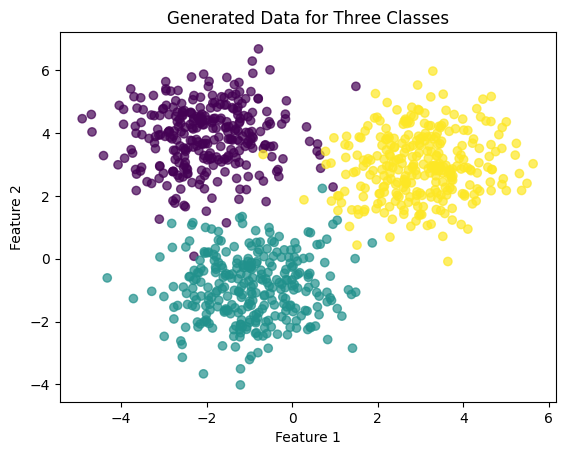

In [10]:
plt.scatter(df['x'], df['y'], c=df['Class'], cmap='viridis', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data for Three Classes')

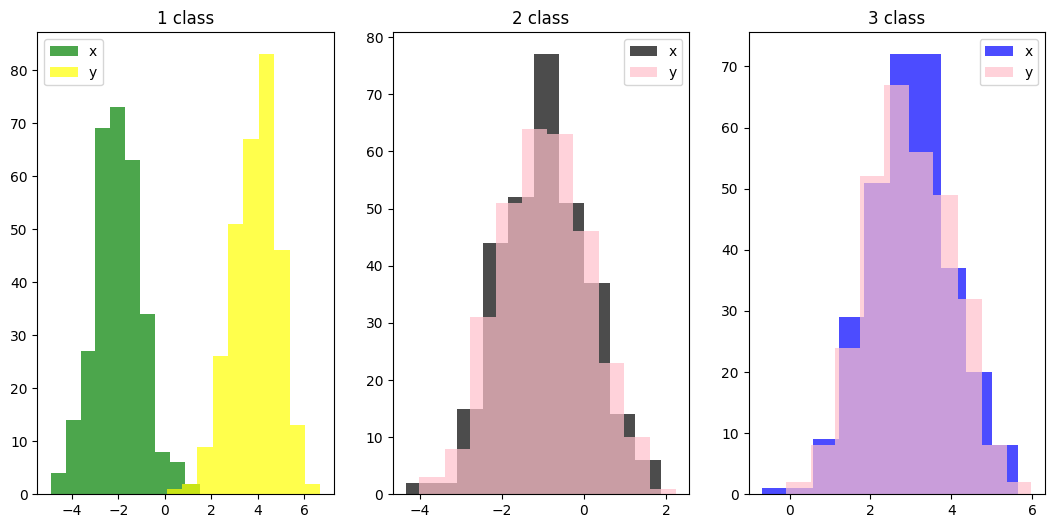

In [11]:
figs,axes = plt.subplots(ncols=3, figsize=(13,6))

axes[0].hist(df[df['Class'] == 0]['x'], bins=10, color='green', alpha=0.7, label='x')
axes[0].hist(df[df['Class'] == 0]['y'], bins=10, color='yellow', alpha=0.7, label='y')
axes[0].set_title('1 class')
axes[0].legend()
axes[1].hist(df[df['Class'] == 1]['x'], bins=10, color='black', alpha=0.7, label='x')
axes[1].hist(df[df['Class'] == 1]['y'], bins=10, color='pink', alpha=0.7, label='y')
axes[1].set_title('2 class')
axes[1].legend()
axes[2].hist(df[df['Class'] == 2]['x'], bins=10, color='blue', alpha=0.7, label='x')
axes[2].hist(df[df['Class'] == 2]['y'], bins=10, color='pink', alpha=0.7, label='y')
axes[2].set_title('3 class')
axes[2].legend()


Ми згенерували 900 точок на 3 класи. Тепер їх центри створенні навколо точок -2, 4; -1, -1  та 3, 3  \

In [12]:
#code

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

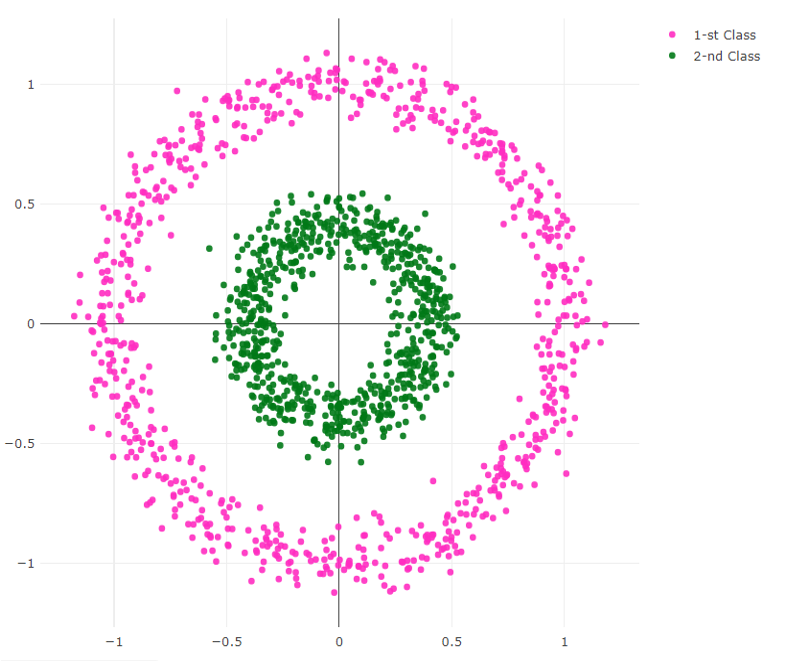

In [13]:
np.random.seed(50)
r_inner = 5      
r_outer = 10     
w = 0.5         

theta_inner = np.random.uniform(0, 2*np.pi, 500)
r_inner_noise = np.random.normal(r_inner, w, 500)
x_inner = r_inner_noise * np.cos(theta_inner)
y_inner = r_inner_noise * np.sin(theta_inner)
class_0 = np.vstack((x_inner, y_inner)).T

theta_outer = np.random.uniform(0, 2*np.pi, 500)
r_outer_noise = np.random.normal(r_outer, w, 500)
x_outer = r_outer_noise * np.cos(theta_outer)
y_outer = r_outer_noise * np.sin(theta_outer)
class_1 = np.vstack((x_outer, y_outer)).T


X = np.vstack((class_0, class_1))
Y = np.hstack((np.zeros(500), np.ones(500)))

df = pd.DataFrame(X, columns=['x', 'y'])
df['Class'] = Y
df.to_csv('tor_in_tor.csv', index=False)




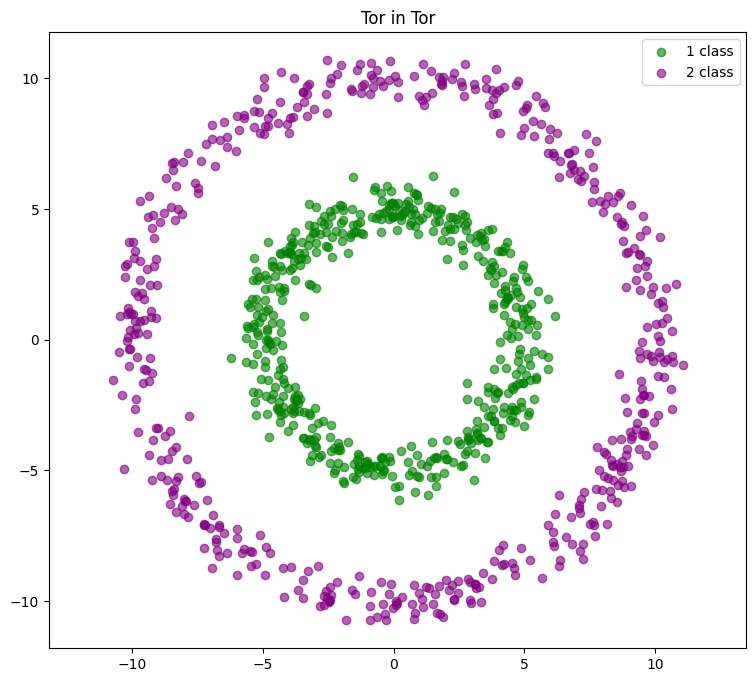

In [14]:
plt.figure(figsize=(9, 8))
plt.scatter(x_inner, y_inner, color='green', label='1 class', alpha=0.6)
plt.scatter(x_outer, y_outer, color='purple', label='2 class', alpha=0.6)
plt.legend()
plt.title('Tor in Tor')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Tor in Tor outer')

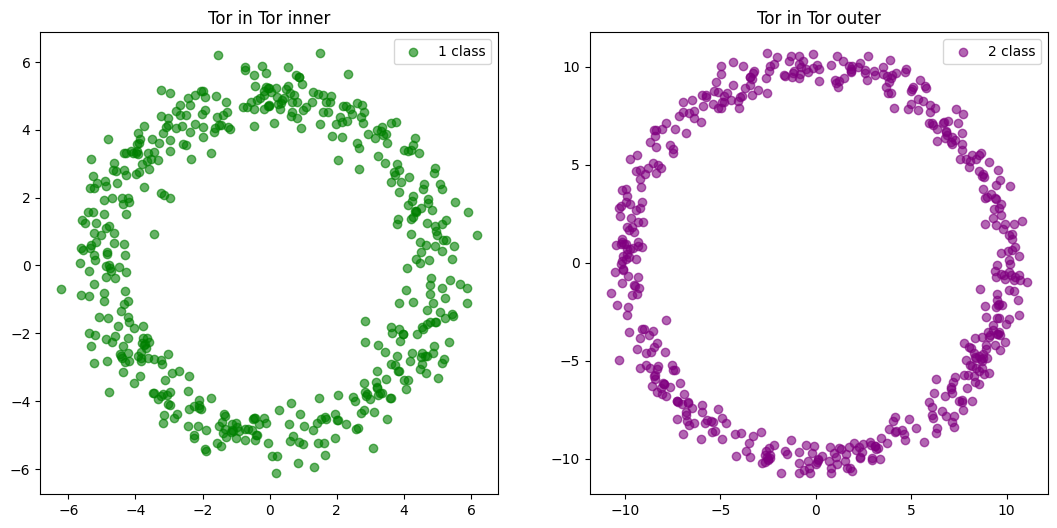

In [15]:
figs,axes = plt.subplots(ncols=2, figsize=(13,6))

axes[0].scatter(x_inner, y_inner, color='green', label='1 class', alpha=0.6)
axes[0].legend()
axes[0].set_title('Tor in Tor inner')

axes[1].scatter(x_outer, y_outer, color='purple', label='2 class', alpha=0.6)
axes[1].legend()
axes[1].set_title('Tor in Tor outer')

Щоб створити дані у вигляді двох торів ми використали різні радіуси для внутрішнього і зовнішнього тора, а також додали невеликий шум, щоб вони виглядали природніше. Випадкові кути допомагають розмістити точки на цих кільцях. У результаті виходять два тори, один всередині іншого.

In [16]:
#code

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

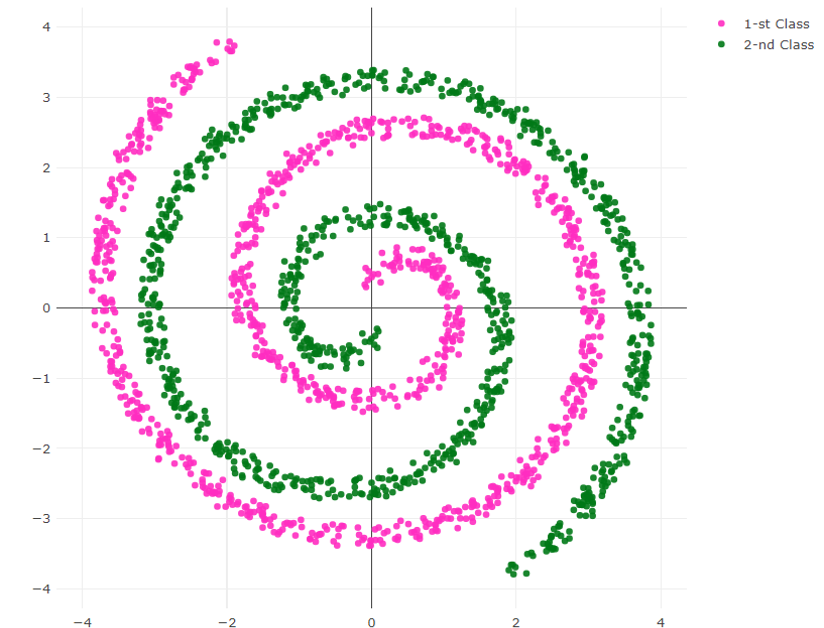

In [17]:
#twospirales

In [18]:
n_points = 500  
turns = 2        
spread = 0.5    

theta = np.sqrt(np.random.rand(n_points)) * 2 * np.pi * turns
r = 2 * theta + np.random.randn(n_points) * spread
x1 = r * np.cos(theta)
y1 = r * np.sin(theta)
class_0 = np.column_stack((x1, y1))

x2 = -r * np.cos(theta)
y2 = -r * np.sin(theta)
class_1 = np.column_stack((x2, y2))


X = np.vstack((class_0, class_1))
Y = np.hstack((np.zeros(500), np.ones(500)))

df = pd.DataFrame(X, columns=['x', 'y'])
df['Class'] = Y
df.to_csv('two_spirales.csv', index=False)


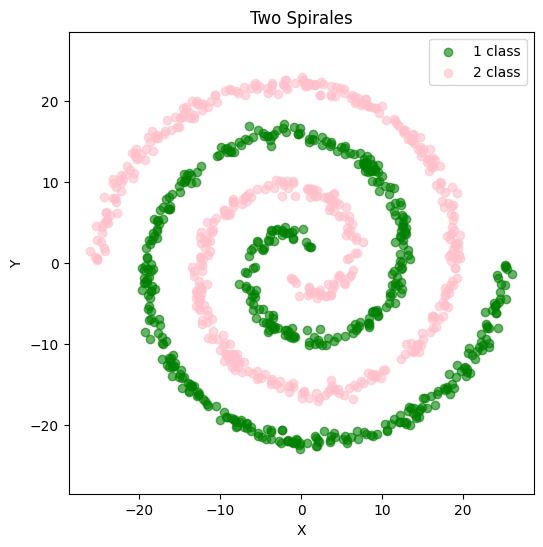

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(x1, y1, color='green', label='1 class', alpha=0.6)
plt.scatter(x2, y2, color='pink', label='2 class', alpha=0.6)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Spirales')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Second Spiral')

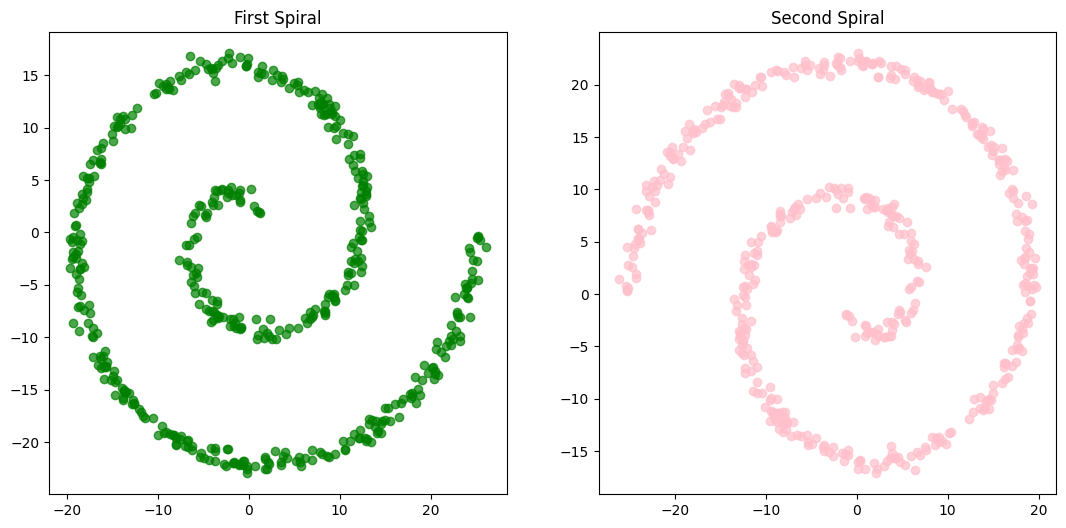

In [20]:
figs,axes = plt.subplots(ncols=2, figsize=(13,6))

axes[0].scatter(x1, y1, color='green', alpha=0.7)
axes[0].set_title('First Spiral')
axes[1].scatter(x2, y2, color='pink', alpha=0.7)
axes[1].set_title('Second Spiral')

Для створення двох спіралей ми використали кути, які визначають, як точки закручуються навколо центру. Радіус збільшується з кожним обертом, а невеликий шум додається, щоб зробити точки менш рівномірними. В результаті виходять дві спіралі, які йдуть у протилежні сторони.

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

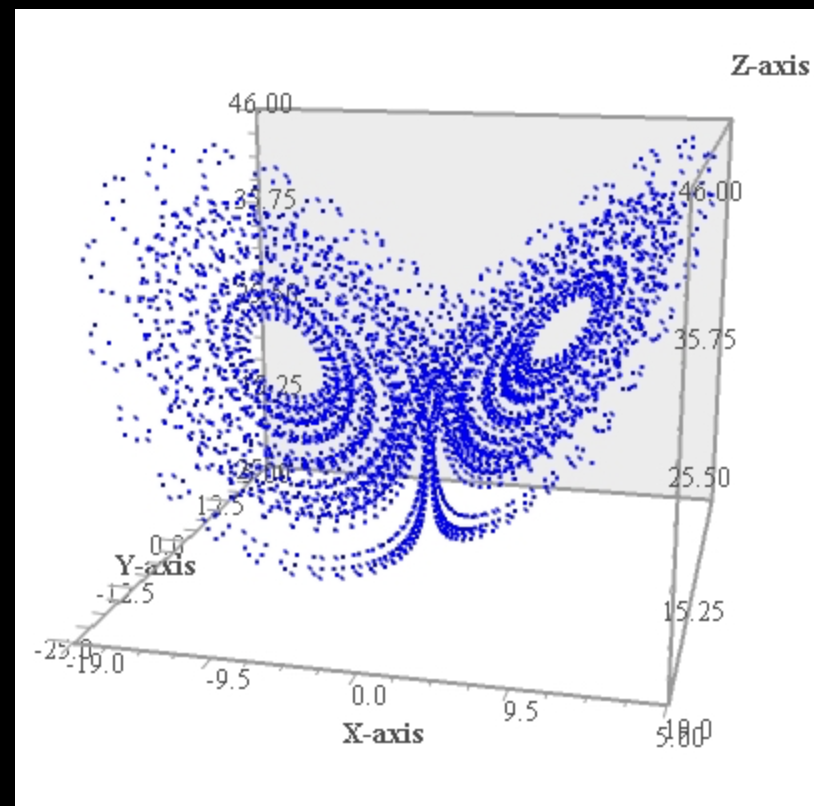

In [29]:
from scipy.integrate import solve_ivp

def lorenz_system(t, state, sigma, rho, beta):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

def generate_lorenz_trajectory(initial_state, sigma, rho, beta, t_span, t_eval):
    sol = solve_ivp(lorenz_system, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval, method='RK45')
    return sol.t, sol.y

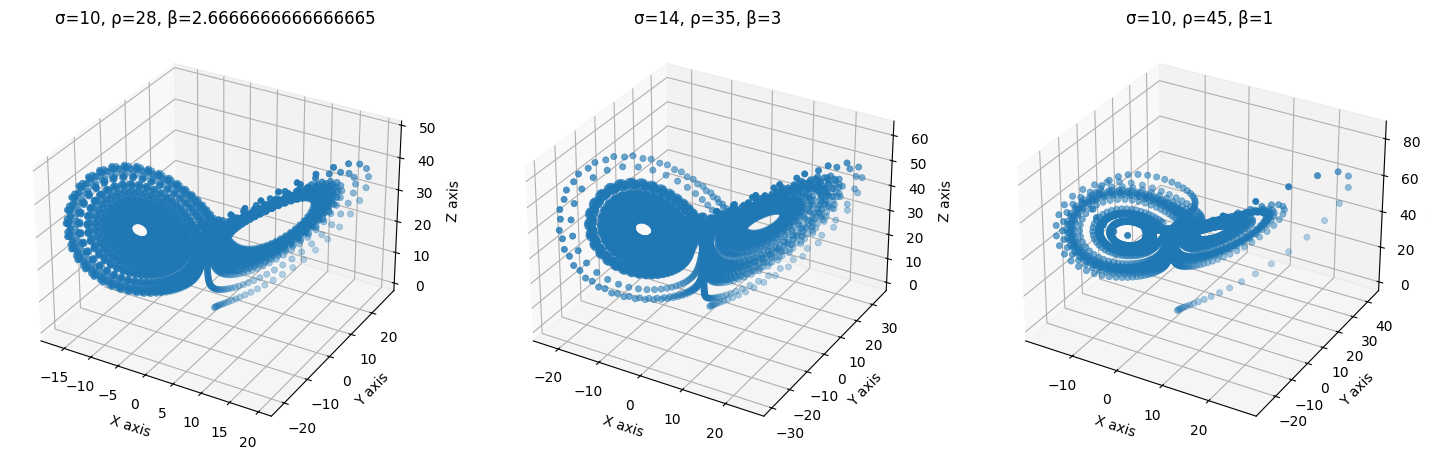

In [30]:
initial_state = [1.0, 1.0, 1.0]

t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 4000)

parameters = [
    (10, 28, 8/3),
    (14, 35, 3),
    (10, 45, 1)
]

fig = plt.figure(figsize=(18, 10))

for i, (sigma, rho, beta) in enumerate(parameters):
    t, trajectory = generate_lorenz_trajectory(initial_state, sigma, rho, beta, t_span, t_eval)
    
    pd.DataFrame({
        'X': trajectory[0],
        'Y': trajectory[1],
        'Z': trajectory[2]
    }).to_csv(f'lorenz_{i}.csv', index=False)

    ax = fig.add_subplot(1, len(parameters), i + 1, projection='3d')
    ax.scatter(trajectory[0], trajectory[1], trajectory[2], lw=0.5)
    ax.set_title(f"σ={sigma}, ρ={rho}, β={beta}")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")

plt.show()

Зміна параметрів системи Лоренца суттєво впливає на її поведінку, переходячи від регулярних до хаотичних траєкторій. Збільшення \(\rho\) робить траєкторії складнішими, тоді як \(\sigma\) і \(\beta\) впливають на довжину і амплітуду коливань.